In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [35]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 20,
    'verbose': 1,
    'btl_size': 2
}

config = Namespace(**config)

print(config)

Namespace(batch_size=256, btl_size=2, n_epochs=20, train_ratio=0.8, verbose=1)


In [36]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)
    
    plt.imshow(x, cmap='gray')
    plt.show()

In [37]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

# Shuffle dataset to split into train/valid set.
# 60000 random shuffling
indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(
    train_y,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

print("Train:", train_x.shape, train_y.shape)
print("Valid:", valid_x.shape, valid_y.shape)
print("Test:", test_x.shape, test_y.shape)

Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


In [38]:
from model import Autoencoder

In [39]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [40]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/20): train_loss=7.2434e-02  valid_loss=4.9973e-02  lowest_loss=4.9973e-02
Epoch(2/20): train_loss=4.8260e-02  valid_loss=4.6082e-02  lowest_loss=4.6082e-02
Epoch(3/20): train_loss=4.5016e-02  valid_loss=4.3373e-02  lowest_loss=4.3373e-02
Epoch(4/20): train_loss=4.3437e-02  valid_loss=4.2041e-02  lowest_loss=4.2041e-02
Epoch(5/20): train_loss=4.2520e-02  valid_loss=4.1521e-02  lowest_loss=4.1521e-02
Epoch(6/20): train_loss=4.1820e-02  valid_loss=4.0539e-02  lowest_loss=4.0539e-02
Epoch(7/20): train_loss=4.1421e-02  valid_loss=4.0470e-02  lowest_loss=4.0470e-02
Epoch(8/20): train_loss=4.0880e-02  valid_loss=4.0317e-02  lowest_loss=4.0317e-02
Epoch(9/20): train_loss=4.0448e-02  valid_loss=3.9258e-02  lowest_loss=3.9258e-02
Epoch(10/20): train_loss=4.0113e-02  valid_loss=3.9219e-02  lowest_loss=3.9219e-02
Epoch(11/20): train_loss=3.9838e-02  valid_loss=3.9888e-02  lowest_loss=3.9219e-02
Epoch(12/20): train_loss=3.9834e-02  valid_loss=3.8746e-02  lowest_loss=3.8746e-02
Epoch(13/20):

## Test

In [33]:
# test x shape : (10000, 784)
test_x[1].view(1, -1).shape
test_x.size(0)
test_x[1].view(1, -1).squeeze().shape

torch.Size([784])

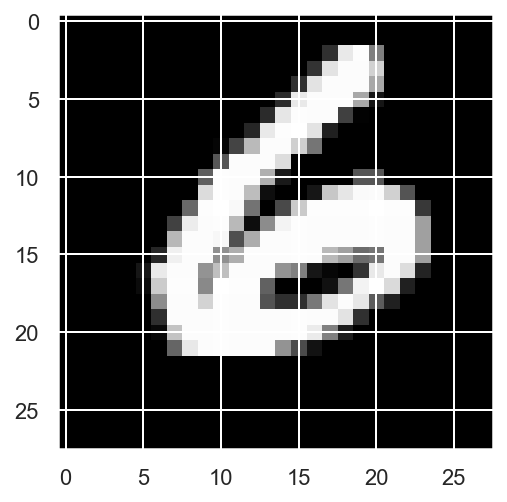

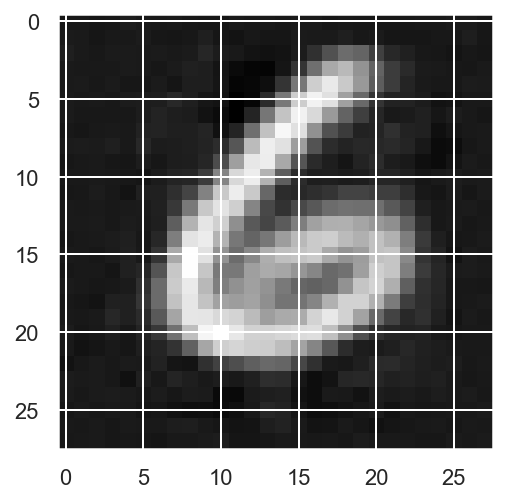

In [48]:
with torch.no_grad():
    import random

    index = int(random.random() * test_x.size(0))

    recon = model(test_x[index].view(1, -1)).squeeze()

    show_image(test_x[index])
    show_image(recon)

## Latent Space

In [45]:
test_x[:1000]
test_y[:1000]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1,
        7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5,
        1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1,
        0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1,
        5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
        9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4,
        1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2,

In [47]:
latents[1]

tensor([ 1.7493, -0.1305])

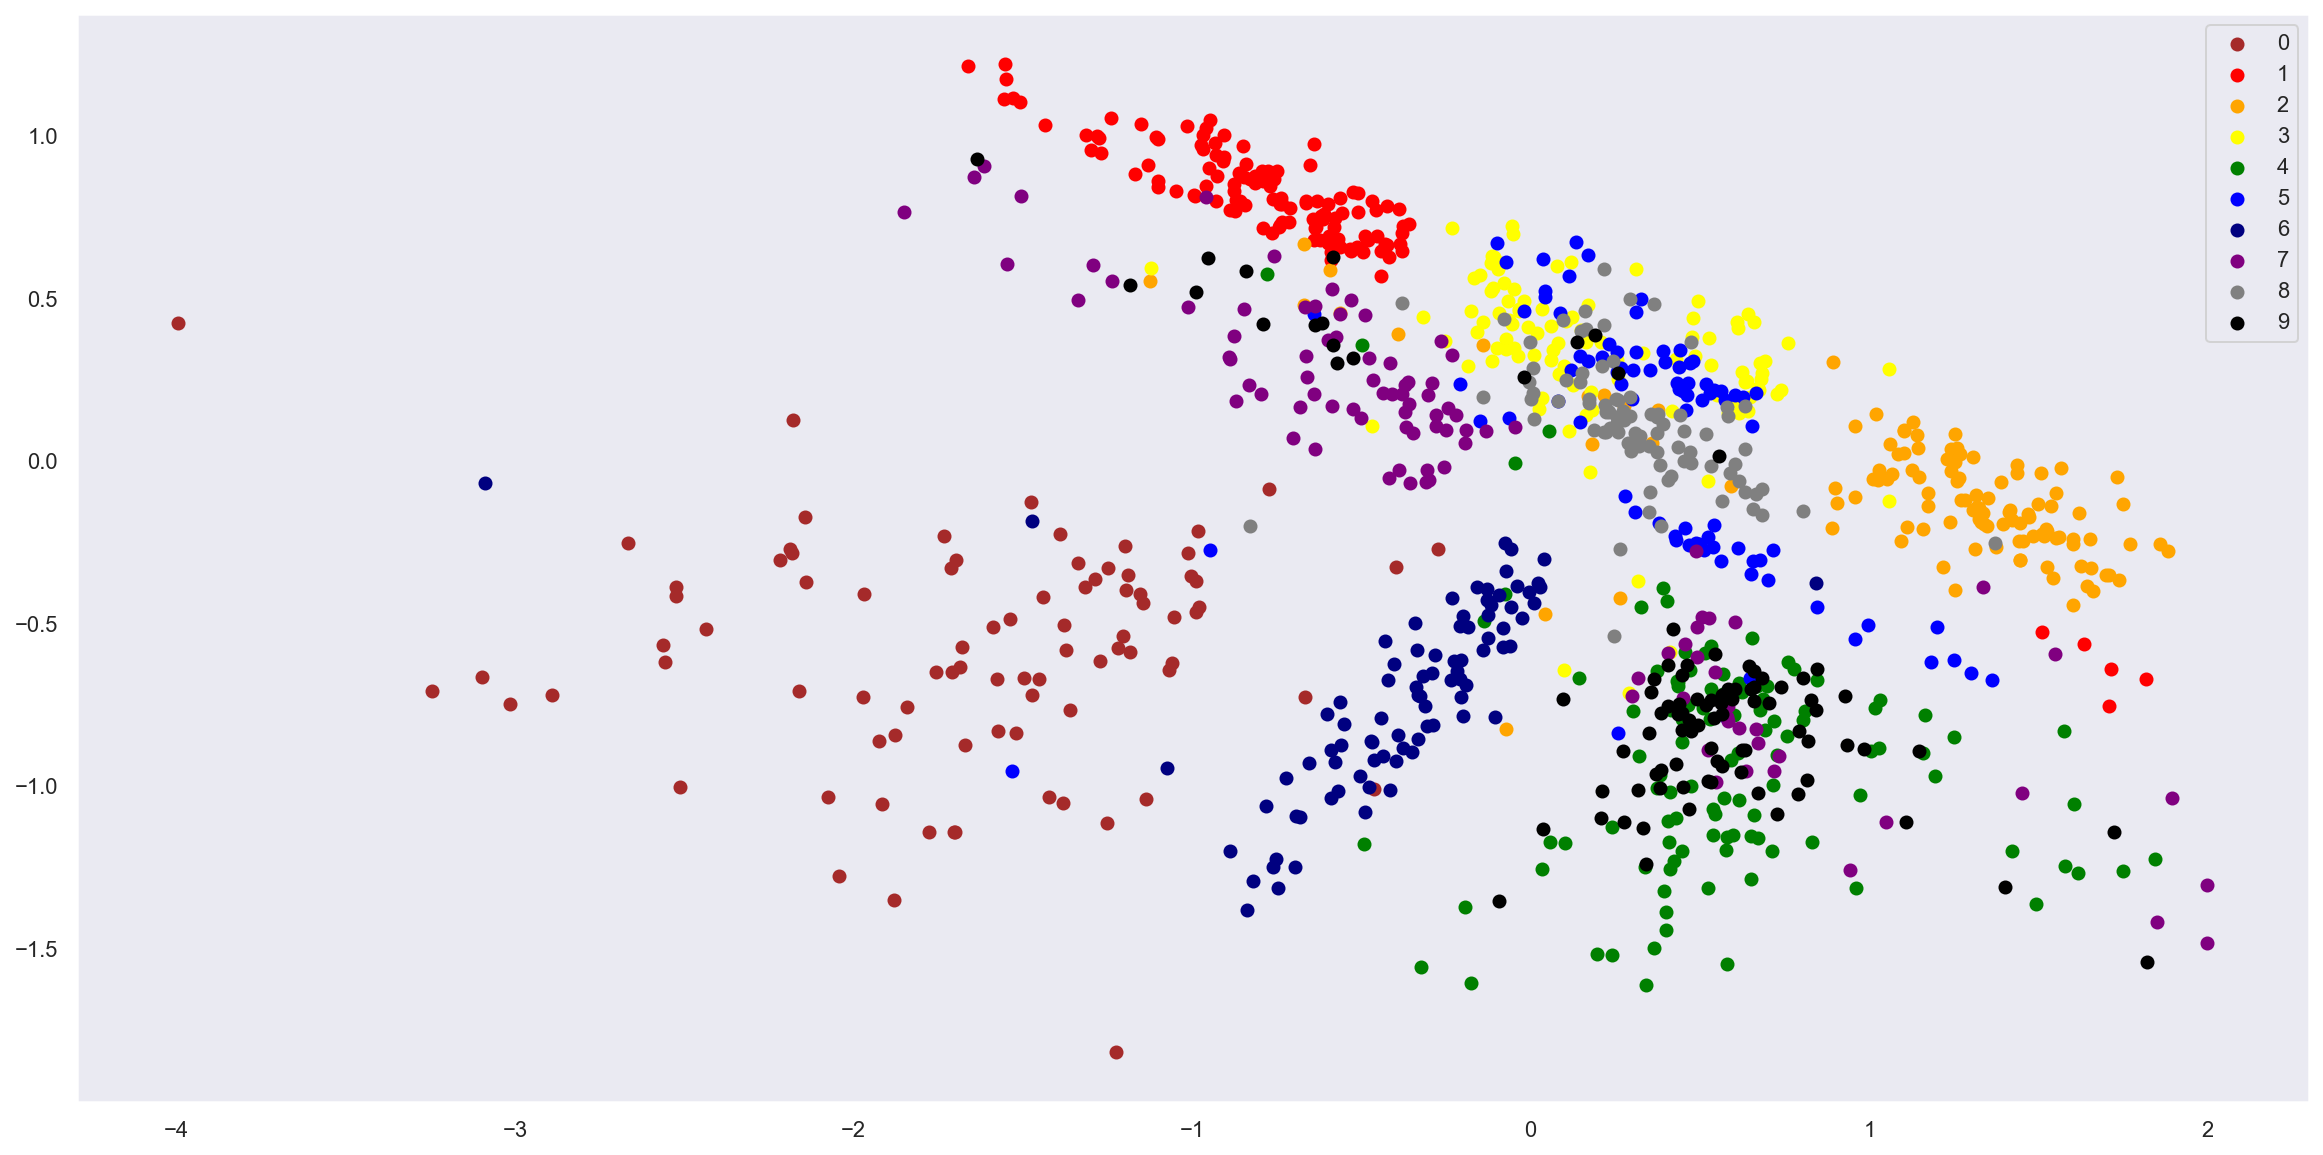

In [46]:
if config.btl_size == 2:
    color_map = [
        'brown', 'red', 'orange', 'yellow', 'green',
        'blue', 'navy', 'purple', 'gray', 'black',
    ]
    
    plt.figure(figsize=(20, 10))
    with torch.no_grad():
        latents = model.encoder(test_x[:1000])
        
        for i in range(10):
            target_latents = latents[test_y[:1000] == i]
            target_y = test_y[:1000][test_y[:1000] == i]
            plt.scatter(target_latents[:, 0],
                        target_latents[:, 1],
                        marker='o',
                        color=color_map[i],
                        label=i)
        
        plt.legend()
        plt.grid(axis='both')
        plt.show()

-2에서 2까지 등구간으로 샘플링해서 그림을 그려보려고 하는 것. 

In [51]:
min_range, max_range = -2., 2.
n = 20
step = (max_range - min_range) / float(n)
step    

0.2

In [84]:
model.decoder(z).view(n, 28, 28).shape

torch.Size([20, 28, 28])

In [64]:
line[1, 1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0081, 0.0751,
        0.1387, 0.0579, 0.0000, 0.0279, 0.0000, 0.0468, 0.0000, 0.1017, 0.0000,
        0.0174, 0.0916, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.1391,
        0.0000], grad_fn=<SelectBackward0>)

In [90]:
line = torch.clamp(model.decoder(z).view(n, 28, 28), 0, 1)
line.shape      
line.shape

torch.Size([20, 28, 28])

In [89]:
line = torch.clamp(model.decoder(z).view(n, 28, 28), 0, 1)
line.shape         
# (28*20, 28)
line = torch.cat([line[i] for i in range(n - 1, 0, -1)], dim=0)
line.shape

torch.Size([532, 28])

In [86]:
lines.shape

torch.Size([560, 560])

In [101]:
line[1].shape

torch.Size([28, 28])

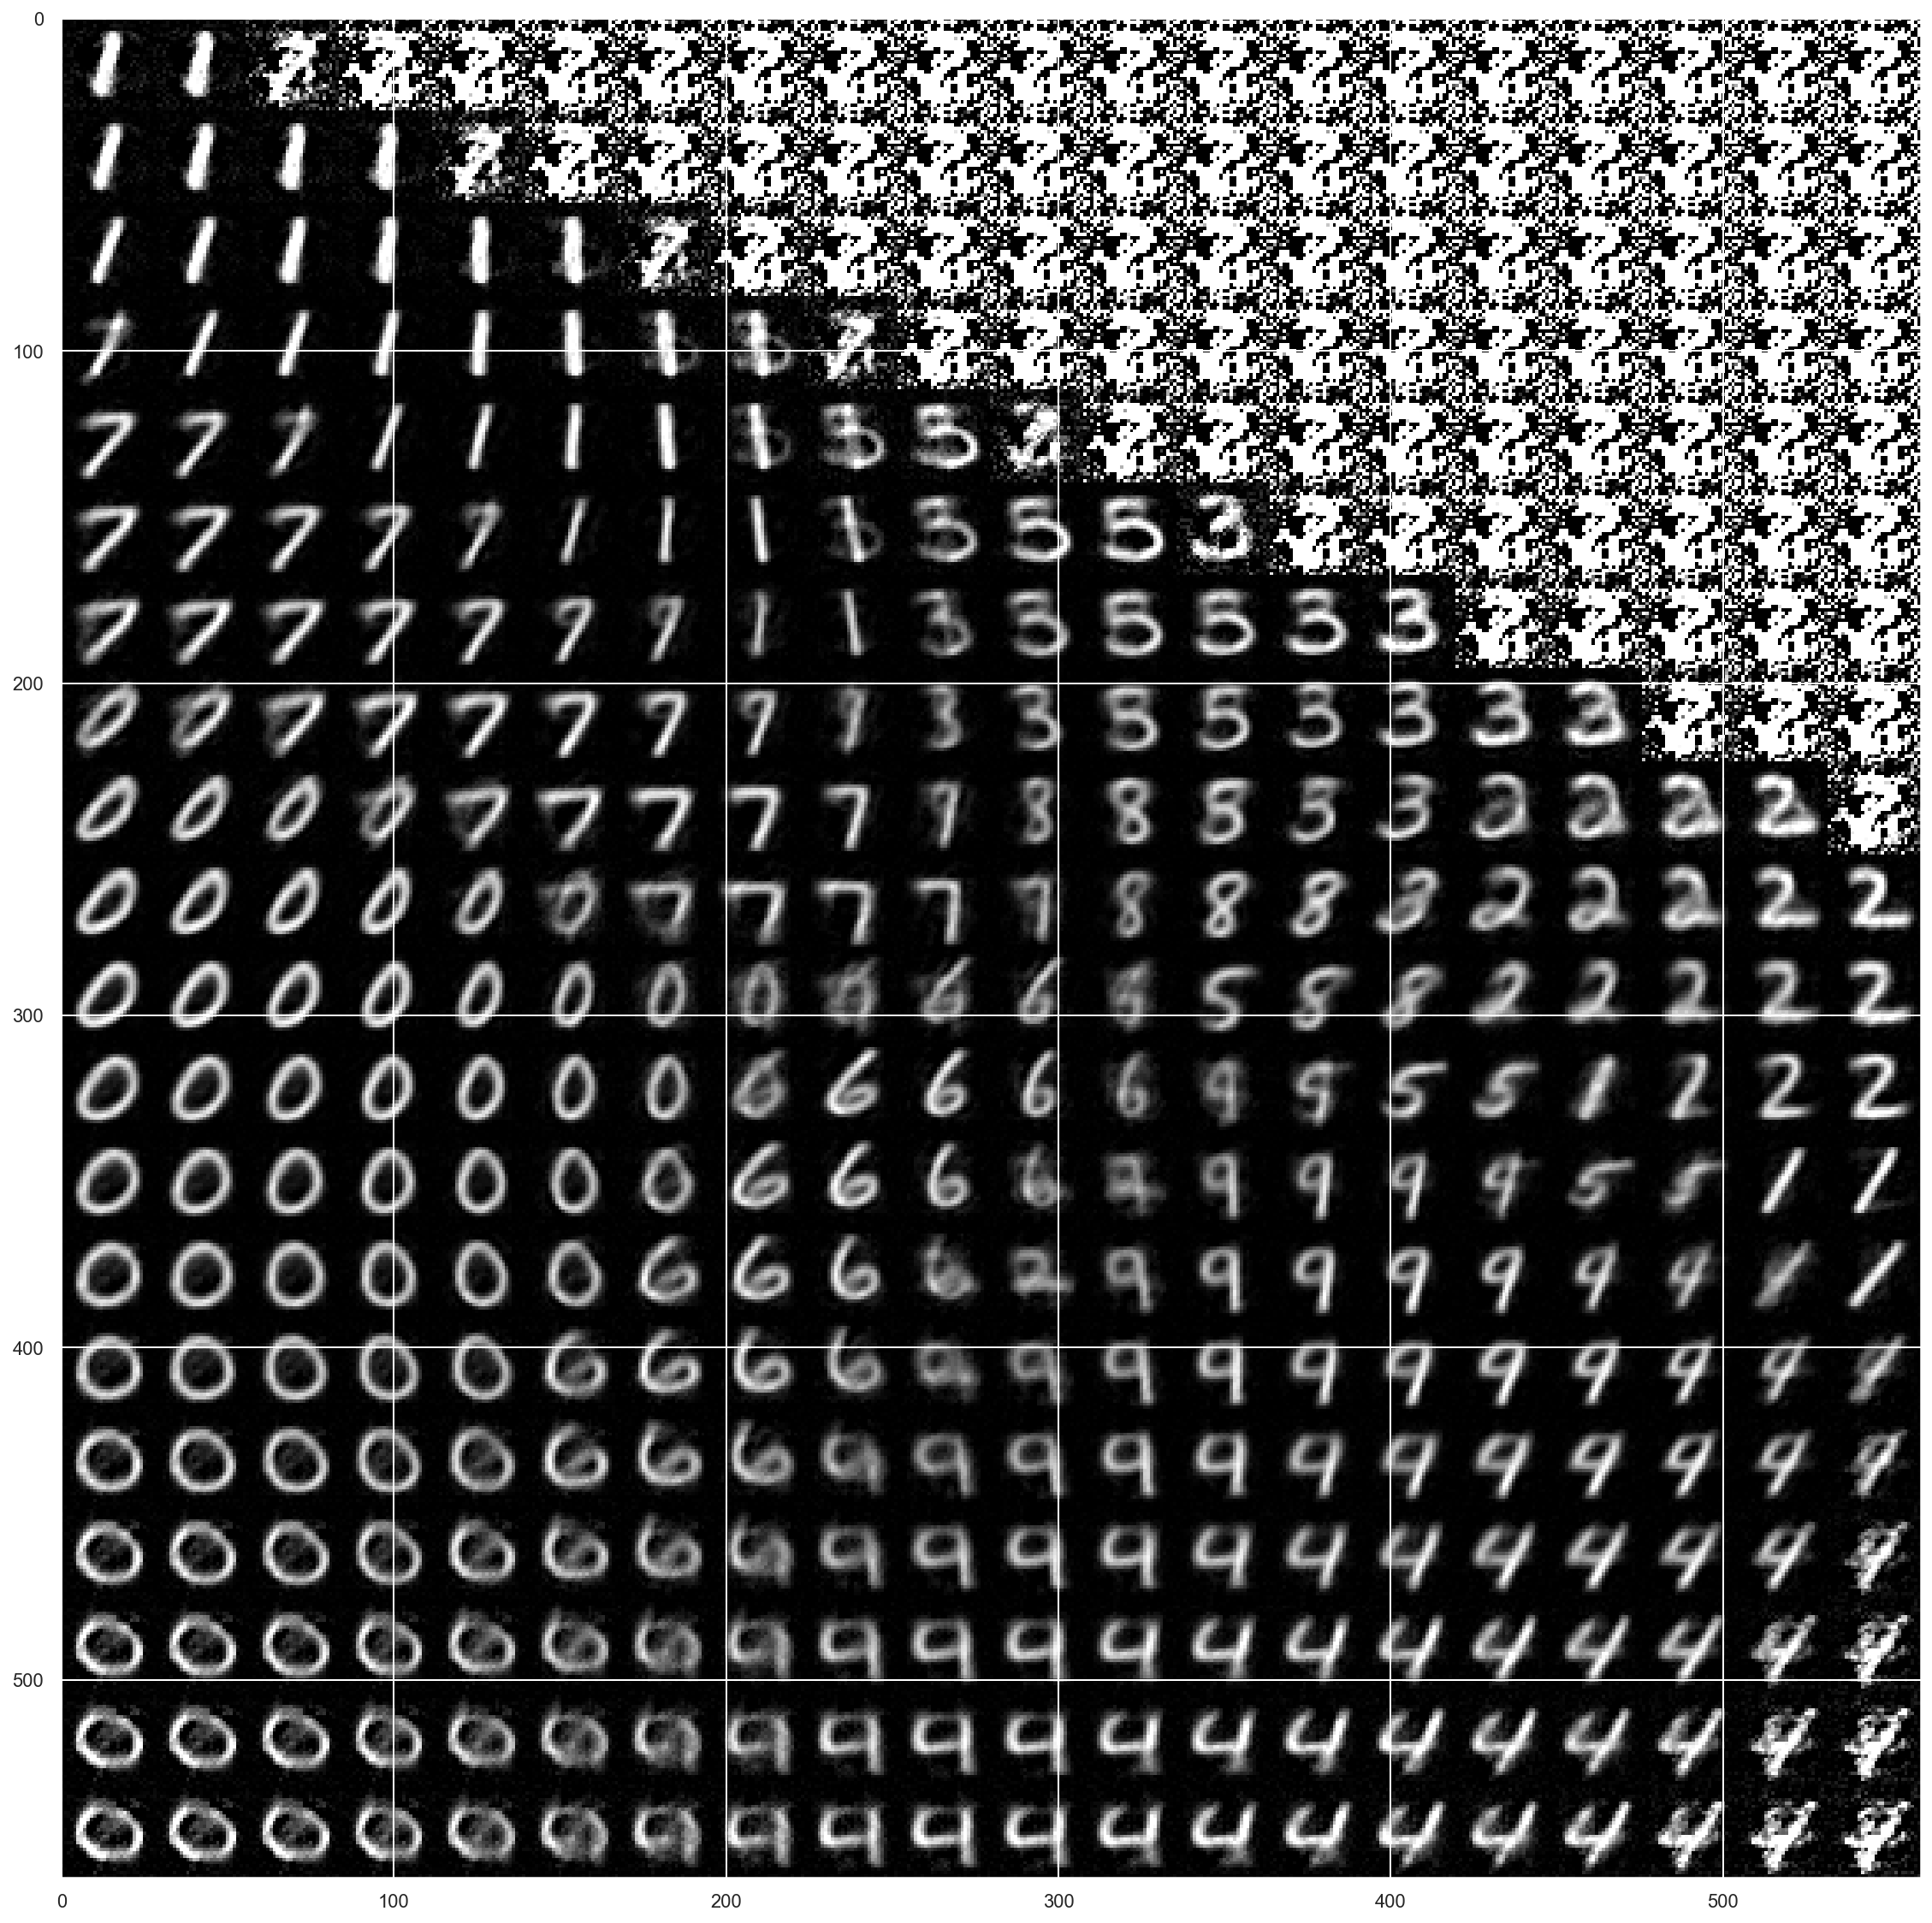

In [85]:
if config.btl_size == 2:
    min_range, max_range = -2., 2.
    n = 20
    step = (max_range - min_range) / float(n)
    
    with torch.no_grad():
        lines = []

        for v1 in np.arange(min_range, max_range, step):
            z = torch.stack([
                torch.FloatTensor([v1] * n),
                torch.FloatTensor([v2 for v2 in np.arange(min_range,
                                                          max_range, step)]),
            ], dim=-1)
            
            # |model.decoder(z)| = (20, 784) -> view (20, 28, 28)
            line = torch.clamp(model.decoder(z).view(n, 28, 28), 0, 1)
            
            # (28*20, 28)
            line = torch.cat([line[i] for i in range(n-1, -1, -1)], dim=0)
            lines += [line]
        # (28*28, 28*20)
        lines = torch.cat(lines, dim=-1)
        plt.figure(figsize=(20, 20))
        show_image(lines)